In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
import numpy as np
%matplotlib inline

In [4]:
import os
files = os.listdir("Data")

In [5]:
df_main = pd.DataFrame()


In [6]:
def Cleaned (clean: str):
    try:
        clean = clean.replace(",", "")
        clean = clean.replace(" ", "")    
    except AttributeError:
        pass
    return clean

In [7]:
for file in files:
    df = pd.read_csv(f"Data/{file}")
    print(df.isnull().values.any())
    df_main =  df_main.append(df, ignore_index=True)

False


C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)


False
False
False
True
False
False
False
False
False
False
False
False
False


C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\2289976599.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_main =  df_main.append(df, ignore_index=True)


In [8]:
df_main.pop("Unnamed: 0")

0         0.0
1         1.0
2         2.0
3         3.0
4         4.0
        ...  
2684    216.0
2685    217.0
2686    218.0
2687    219.0
2688    220.0
Name: Unnamed: 0, Length: 2689, dtype: float64

In [9]:
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,ESTIMATED BUDGET
0,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010.0,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010.0,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [10]:
df_main['BUDGETYEAR'] = df_main['BUDGETYEAR'].astype(int)
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,ESTIMATED BUDGET
0,2010,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [11]:
df_main.tail()
for coll in df_main.columns:
    print(coll)
df_main.rename(columns = {'ESTIMATED BUDGET':'TOTAL BUDGET'}, inplace=True)

BUDGETYEAR
BUDGET CATEGORY
TYPE OF EXPENDITURE
GOVERNMENT AGENCY
ESTIMATED BUDGET


In [12]:
df_main.isnull().sum()

BUDGETYEAR             0
BUDGET CATEGORY        1
TYPE OF EXPENDITURE    0
GOVERNMENT AGENCY      0
TOTAL BUDGET           0
dtype: int64

In [13]:
df_main = df_main.fillna(0)


In [14]:
df_main.isnull().sum()

BUDGETYEAR             0
BUDGET CATEGORY        0
TYPE OF EXPENDITURE    0
GOVERNMENT AGENCY      0
TOTAL BUDGET           0
dtype: int64

In [15]:
df_main["TOTAL BUDGET"] = df_main["TOTAL BUDGET"].apply(Cleaned)

In [16]:
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,TOTAL BUDGET
0,2010,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [17]:
col = ['Unnamed: 0', 'BUDGETYEAR', 'BUDGET CATEGORY', 'TYPE OF EXPENDITURE',
       'GOVERNMENT AGENCY', 'TOTAL BUDGET']
government_agency = col[4]
expenditure_type = col[3]
budget_category = col[2]
budget_year = col[1]
budget_amount = col[5]


In [18]:
df_main[budget_year].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])

In [19]:
df_temp  = df_main[[budget_year, budget_amount]]
# df_main.groupby([year]).sum()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BUDGETYEAR    2689 non-null   int32 
 1   TOTAL BUDGET  2689 non-null   object
dtypes: int32(1), object(1)
memory usage: 31.6+ KB


In [20]:
df_temp[budget_year] = df_temp[budget_year].astype(int)

C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\269803411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[budget_year] = df_temp[budget_year].astype(int)


In [21]:
from math import floor

def divide(val):
    # val = float(val)
    # print(val)
    # divisor = 10000000000
    # d = floor(val / divisor)
    # return int(d)
    return float(val)

In [22]:
df_temp[budget_amount] = df_temp[budget_amount].apply(divide)


C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\3575314723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[budget_amount] = df_temp[budget_amount].apply(divide)


In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BUDGETYEAR    2689 non-null   int32  
 1   TOTAL BUDGET  2689 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 31.6 KB


In [24]:
df_grouped = df_temp.groupby([budget_year]).sum()
df_grouped


,TOTAL BUDGET
BUDGETYEAR,
2010,4.250801e+12
2011,7.948285e+12
2012,4.869293e+12
2013,5.150311e+12
2014,5.214118e+12
2015,5.161699e+12
2016,6.171679e+12
2017,8.439269e+12
2018,8.653561e+12


In [25]:
df_grouped = pd.read_csv("allbudget.csv")
df_grouped.rename(columns = {'ESTIMATED BUDGET':'TOTAL BUDGET'}, inplace=True)

<AxesSubplot:title={'center':'Line Chart'}, xlabel='BUDGETYEAR'>

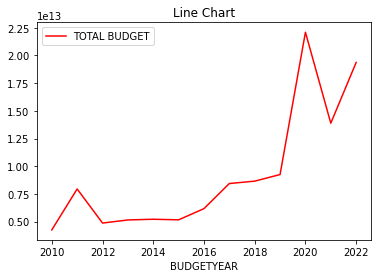

In [26]:
from turtle import title


df_grouped.head()
df_grouped.plot(budget_year, budget_amount, color="red", title = 'Line Chart')

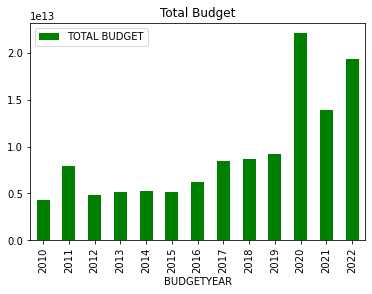

In [27]:
axes = df_grouped.plot.bar(budget_year, budget_amount, color="green", title = 'Total Budget')

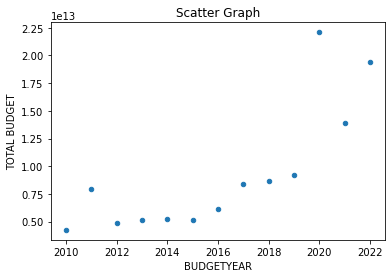

In [28]:
from turtle import title


df_grouped.plot(budget_year, budget_amount, kind = 'scatter', title = 'Scatter Graph')
plt.show()

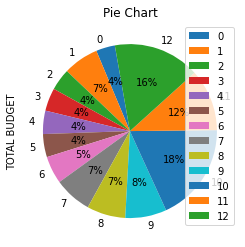

In [29]:
from turtle import color, title
from matplotlib import colors
df_grouped.plot(budget_year, budget_amount, kind = 'pie', autopct='%1.0f%%', startangle=100, title = 'Pie Chart')
plt.show()

In [30]:
df_grouped.columns

Index(['BUDGETYEAR', 'TOTAL BUDGET'], dtype='object')

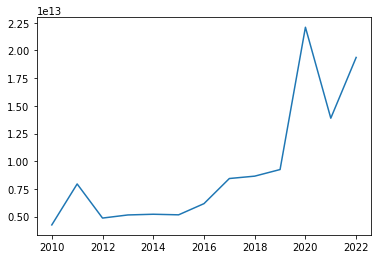

In [31]:
plt.plot(df_grouped[budget_year], df_grouped[budget_amount])

<AxesSubplot:>

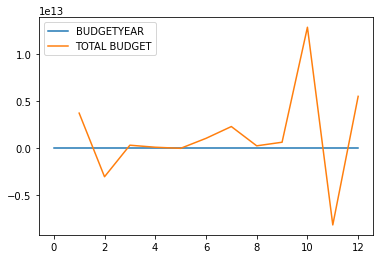

In [32]:
# yt = yt - y(t-1)
df = df_grouped
df['TOTAL BUDGET'] =  df['TOTAL BUDGET'] - df['TOTAL BUDGET'].shift(1)
df.plot()

In [33]:
from prophet import Prophet 

In [34]:
m = Prophet()
# 2010-01-01

In [35]:
def change_year_to_format(year):
    year = str(year)
    return year + "-01-01"

In [36]:
df_grouped[budget_year] = df_grouped[budget_year].apply(change_year_to_format)

In [37]:
df_grouped.head()

,BUDGETYEAR,TOTAL BUDGET
0,2010-01-01,NaN
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [38]:
df_grouped[budget_year] = pd.to_datetime(df_grouped[budget_year])

In [39]:
df_grouped.head()

,BUDGETYEAR,TOTAL BUDGET
0,2010-01-01,NaN
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [40]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   BUDGETYEAR    13 non-null     datetime64[ns]
 1   TOTAL BUDGET  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.0 bytes


In [41]:
df_grouped.rename(columns = {budget_year:'ds', budget_amount:'y'}, inplace = True)

In [42]:
df_grouped.fillna(0, inplace=True)

In [43]:
df_ = df_grouped
df = df_grouped

In [44]:
df.head()

,ds,y
0,2010-01-01,0.000000e+00
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [45]:
m.fit(df)

04:57:41 - cmdstanpy - INFO - Chain [1] start processing
04:57:41 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=3, freq="Y")
# future.head()
future.tail()

,ds
11,2021-01-01
12,2022-01-01
13,2022-12-31
14,2023-12-31
15,2024-12-31


In [47]:
forecast = m.predict(future)
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
11,2021-01-01,2.504930e+12,-4.923474e+12,5.171752e+12,2.504930e+12,2.504930e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,0.0,0.0,0.0,3.598815e+10
12,2022-01-01,2.782011e+12,-2.992307e+12,7.330583e+12,2.782011e+12,2.782011e+12,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,0.0,0.0,0.0,2.033123e+12
13,2022-12-31,3.058331e+12,5.443077e+12,1.583279e+13,3.058331e+12,3.058331e+12,7.658670e+12,7.658670e+12,7.658670e+12,7.658670e+12,7.658670e+12,7.658670e+12,0.0,0.0,0.0,1.071700e+13
14,2023-12-31,3.335411e+12,7.467757e+12,1.756241e+13,3.335411e+12,3.335411e+12,9.287419e+12,9.287419e+12,9.287419e+12,9.287419e+12,9.287419e+12,9.287419e+12,0.0,0.0,0.0,1.262283e+13
15,2024-12-31,3.613251e+12,2.973634e+12,1.286973e+13,3.613251e+12,3.613251e+12,4.342392e+12,4.342392e+12,4.342392e+12,4.342392e+12,4.342392e+12,4.342392e+12,0.0,0.0,0.0,7.955643e+12


In [48]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,-5.452273e+11,-6.771525e+12,3.770923e+12,-5.452273e+11,-5.452273e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,0.0,0.0,0.0,-1.294115e+12
1,2011-01-01,-2.681472e+11,-4.770190e+12,6.125141e+12,-2.681472e+11,-2.681472e+11,9.610687e+11,9.610687e+11,9.610687e+11,9.610687e+11,9.610687e+11,9.610687e+11,0.0,0.0,0.0,6.929214e+11
2,2012-01-01,8.932811e+09,-2.590889e+12,8.247796e+12,8.932811e+09,8.932811e+09,2.658848e+12,2.658848e+12,2.658848e+12,2.658848e+12,2.658848e+12,2.658848e+12,0.0,0.0,0.0,2.667781e+12
3,2013-01-01,2.867720e+11,-7.026839e+12,2.856164e+12,2.867720e+11,2.867720e+11,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,-2.468942e+12,0.0,0.0,0.0,-2.182170e+12
4,2014-01-01,5.638520e+11,-4.968456e+12,4.740593e+12,5.638520e+11,5.638520e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,-7.488877e+11,0.0,0.0,0.0,-1.850357e+11


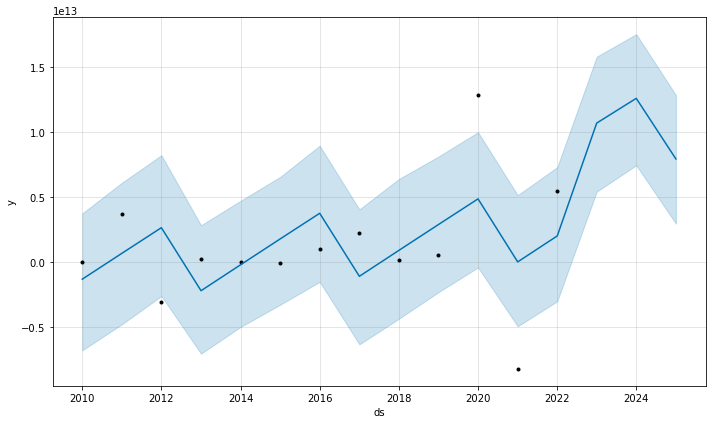

In [49]:
fig1 = m.plot(forecast)

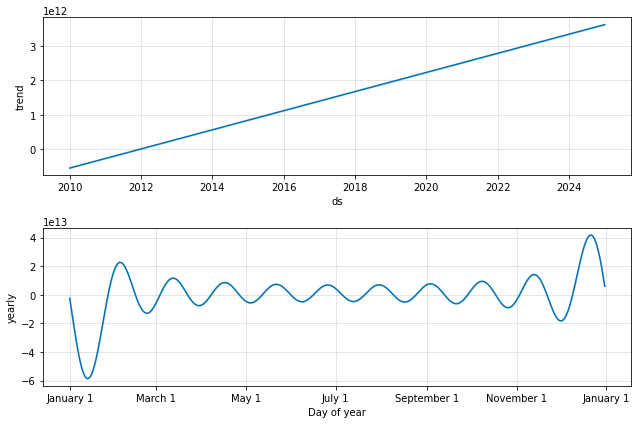

In [50]:
fig2 = m.plot_components(forecast)

In [51]:
from prophet.diagnostics import cross_validation

In [52]:
cv = cross_validation(m, initial= '365 days', period='730 days', horizon='365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/6 [00:00<?, ?it/s]

04:57:46 - cmdstanpy - INFO - Chain [1] start processing
04:57:46 - cmdstanpy - INFO - Chain [1] done processing
04:57:48 - cmdstanpy - INFO - Chain [1] start processing
04:57:48 - cmdstanpy - INFO - Chain [1] done processing
04:57:49 - cmdstanpy - INFO - Chain [1] start processing
04:57:50 - cmdstanpy - INFO - Chain [1] done processing
04:57:51 - cmdstanpy - INFO - Chain [1] start processing
04:57:51 - cmdstanpy - INFO - Chain [1] done processing
04:57:53 - cmdstanpy - INFO - Chain [1] start processing
04:57:53 - cmdstanpy - INFO - Chain [1] done processing
04:57:55 - cmdstanpy - INFO - Chain [1] start processing
04:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
cv.head(14)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-01-01,7.399360e+12,7.399360e+12,7.399360e+12,-3.078991e+12,2011-01-04
1,2014-01-01,-1.203123e+12,-3.627029e+12,1.288990e+12,6.380703e+10,2013-01-03
2,2016-01-01,-1.540824e+12,-3.401657e+12,7.905723e+11,1.009980e+12,2015-01-03
3,2018-01-01,1.276769e+12,-9.116734e+11,3.312303e+12,2.142922e+11,2017-01-02
4,2020-01-01,9.768750e+10,-1.824357e+12,2.029004e+12,1.284583e+13,2019-01-02
5,2022-01-01,7.227907e+11,-4.759632e+12,6.139990e+12,5.484574e+12,2021-01-01


In [91]:
from prophet.diagnostics import performance_metrics

In [93]:
df_pm = performance_metrics(cv)
df_pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,362 days,1.097958e+26,1.047835e+13,1.047835e+13,3.403177,3.403177,2.000000,0.0
1,363 days,4.055855e+24,2.013915e+12,1.908867e+12,11.190626,11.190626,2.000000,0.5
2,364 days,8.182204e+25,9.045553e+12,6.905311e+12,2.975236,2.975236,1.697470,0.5
3,365 days,2.267458e+25,4.761783e+12,4.761783e+12,0.868214,0.868214,1.534237,1.0


In [94]:
from prophet.plot import plot_cross_validation_metric

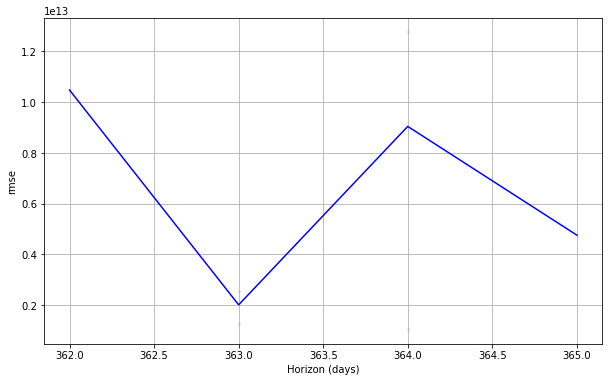

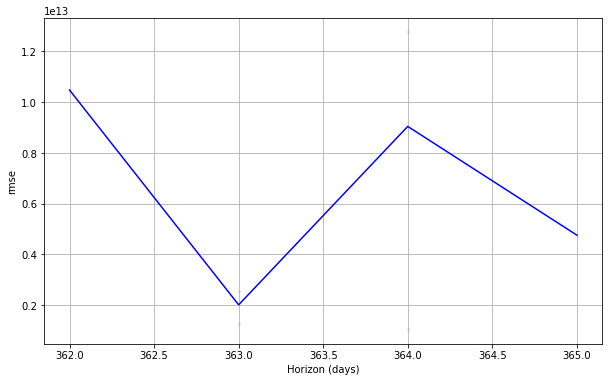

In [96]:
plot_cross_validation_metric(cv , metric='rmse')

In [53]:
model = Prophet()

df_.drop(df_.tail(2).index,inplace=True) 
df_.tail()

,ds,y
6,2016-01-01,1.009980e+12
7,2017-01-01,2.267590e+12
8,2018-01-01,2.142922e+11
9,2019-01-01,5.966806e+11
10,2020-01-01,1.284583e+13


In [54]:
df_.head()

,ds,y
0,2010-01-01,0.000000e+00
1,2011-01-01,3.697484e+12
2,2012-01-01,-3.078991e+12
3,2013-01-01,2.810174e+11
4,2014-01-01,6.380703e+10


In [55]:
model.fit(df_)
future = model.make_future_dataframe(periods=3, freq="Y")
# future.head()
future.tail()

04:57:57 - cmdstanpy - INFO - Chain [1] start processing
04:57:57 - cmdstanpy - INFO - Chain [1] done processing


,ds
9,2019-01-01
10,2020-01-01
11,2020-12-31
12,2021-12-31
13,2022-12-31


In [56]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9,2019-01-01,5.858948e+12,1.435486e+11,8.354969e+12,5.858948e+12,5.858948e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,0.0,0.0,0.0,4.126634e+12
10,2020-01-01,6.425886e+12,1.046010e+12,9.535325e+12,6.425886e+12,6.425886e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,0.0,0.0,0.0,5.381948e+12
11,2020-12-31,6.992825e+12,2.287287e+12,1.074293e+13,6.992825e+12,6.992825e+12,-3.390909e+11,-3.390909e+11,-3.390909e+11,-3.390909e+11,-3.390909e+11,-3.390909e+11,0.0,0.0,0.0,6.653734e+12
12,2021-12-31,7.559763e+12,3.874391e+12,1.217069e+13,7.559763e+12,7.559763e+12,3.813540e+11,3.813540e+11,3.813540e+11,3.813540e+11,3.813540e+11,3.813540e+11,0.0,0.0,0.0,7.941117e+12
13,2022-12-31,8.126701e+12,5.137701e+12,1.339510e+13,8.126701e+12,8.126701e+12,1.116494e+12,1.116494e+12,1.116494e+12,1.116494e+12,1.116494e+12,1.116494e+12,0.0,0.0,0.0,9.243195e+12


In [57]:
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,7.533978e+11,-5.726579e+12,2.567060e+12,7.533978e+11,7.533978e+11,-2.403370e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,0.0,0.0,0.0,-1.649972e+12
1,2011-01-01,1.320336e+12,-4.932907e+12,3.527087e+12,1.320336e+12,1.320336e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,-1.732314e+12,0.0,0.0,0.0,-4.119778e+11
2,2012-01-01,1.887274e+12,-3.384243e+12,5.079532e+12,1.887274e+12,1.887274e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,-1.043939e+12,0.0,0.0,0.0,8.433357e+11
3,2013-01-01,2.455766e+12,-4.887650e+12,3.851705e+12,2.455766e+12,2.455766e+12,-3.056291e+12,-3.056291e+12,-3.056291e+12,-3.056291e+12,-3.056291e+12,-3.056291e+12,0.0,0.0,0.0,-6.005253e+11
4,2014-01-01,3.022704e+12,-3.430923e+12,4.693971e+12,3.022704e+12,3.022704e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,-2.403370e+12,0.0,0.0,0.0,6.193337e+11


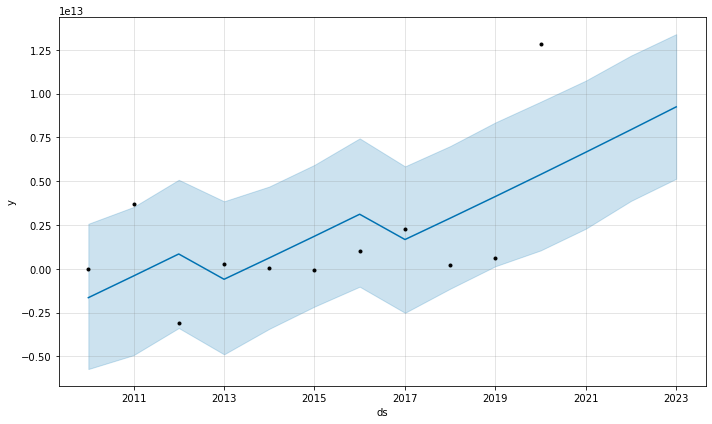

In [58]:
fig1_ = model.plot(forecast)


In [59]:
# group by categories . 
df_main[expenditure_type].unique()

array(['NON RECURRENT  EXPENDITURE', 'RECURRENT  EXPENDITURE',
       'CAPITAL EXPENDITURE', 'RECURRENT (NON-DEBT) EXPENDITURE',
       'RECURRENT (NON DEBT) EXPENDITURE',
       'RECURRENT(NON DEBT)  EXPENDITURE', 'SUBSIDY RE-INVESTMENT'],
      dtype=object)

In [60]:
df_main.replace({'RECURRENT (NON DEBT) EXPENDITURE':'RECURRENT (NON-DEBT) EXPENDITURE'}, inplace=True)
df_main.replace({'RECURRENT(NON DEBT)  EXPENDITURE':'RECURRENT (NON-DEBT) EXPENDITURE'}, inplace=True)

In [61]:
df_main[expenditure_type].unique()

array(['NON RECURRENT  EXPENDITURE', 'RECURRENT  EXPENDITURE',
       'CAPITAL EXPENDITURE', 'RECURRENT (NON-DEBT) EXPENDITURE',
       'SUBSIDY RE-INVESTMENT'], dtype=object)

In [62]:
df_main.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,TOTAL BUDGET
0,2010,STATUTORY,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,91000000000.0
1,2010,STATUTORY,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,35624771198.0
2,2010,STATUTORY,NON RECURRENT EXPENDITURE,NDDC ARREARS OF SHARE OF EXCESS CRUDE DISTRIBU...,9312986292.0
3,2010,STATUTORY,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,44341401504.0
4,2010,DEBT SERVICE,NON RECURRENT EXPENDITURE,DOMESTIC DEBTS,478155330805.0


In [63]:
df_expenditure = df_main[[budget_year, expenditure_type, budget_amount]]
df_expenditure.head()

,BUDGETYEAR,TYPE OF EXPENDITURE,TOTAL BUDGET
0,2010,NON RECURRENT EXPENDITURE,91000000000.0
1,2010,NON RECURRENT EXPENDITURE,35624771198.0
2,2010,NON RECURRENT EXPENDITURE,9312986292.0
3,2010,NON RECURRENT EXPENDITURE,44341401504.0
4,2010,NON RECURRENT EXPENDITURE,478155330805.0


In [64]:
df_expenditure = df_expenditure.groupby(budget_year)
# split the grouped dataframe into a list of dataframes by their year. 
all_expenditure_dfs = [df_expenditure.get_group(x) for x in df_expenditure.groups]

In [65]:
all_expenditure_dfs[0].head()

,BUDGETYEAR,TYPE OF EXPENDITURE,TOTAL BUDGET
0,2010,NON RECURRENT EXPENDITURE,91000000000.0
1,2010,NON RECURRENT EXPENDITURE,35624771198.0
2,2010,NON RECURRENT EXPENDITURE,9312986292.0
3,2010,NON RECURRENT EXPENDITURE,44341401504.0
4,2010,NON RECURRENT EXPENDITURE,478155330805.0


In [66]:
# use a for loop to acomplish this later 
new_df_expenditure = []
df_expenditures = pd.DataFrame()

for dataframe in all_expenditure_dfs:
    dataframes_year = dataframe[budget_year].iloc[0]
    dataframe = dataframe.groupby(expenditure_type).sum()
    dataframe["year"] = dataframes_year
    df_expenditures =  df_expenditures.append(dataframe)



C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1045912956.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_expenditures =  df_expenditures.append(dataframe)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1045912956.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_expenditures =  df_expenditures.append(dataframe)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1045912956.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_expenditures =  df_expenditures.append(dataframe)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1045912956.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_expenditures =  df_expenditures.ap

In [67]:
df_expenditures.head()

,BUDGETYEAR,year
TYPE OF EXPENDITURE,,
CAPITAL EXPENDITURE,138690,2010
NON RECURRENT EXPENDITURE,12060,2010
RECURRENT EXPENDITURE,221100,2010
CAPITAL EXPENDITURE,180990,2011
NON RECURRENT EXPENDITURE,10055,2011


In [68]:
df_expenditures[expenditure_type] = df_expenditures.index
df_expenditures.head()
# drop the inxed or make values. 

,BUDGETYEAR,year,TYPE OF EXPENDITURE
TYPE OF EXPENDITURE,,,
CAPITAL EXPENDITURE,138690,2010,CAPITAL EXPENDITURE
NON RECURRENT EXPENDITURE,12060,2010,NON RECURRENT EXPENDITURE
RECURRENT EXPENDITURE,221100,2010,RECURRENT EXPENDITURE
CAPITAL EXPENDITURE,180990,2011,CAPITAL EXPENDITURE
NON RECURRENT EXPENDITURE,10055,2011,NON RECURRENT EXPENDITURE


In [69]:
df_expenditures[expenditure_type].unique()

array(['CAPITAL EXPENDITURE', 'NON RECURRENT  EXPENDITURE',
       'RECURRENT  EXPENDITURE', 'RECURRENT (NON-DEBT) EXPENDITURE',
       'SUBSIDY RE-INVESTMENT'], dtype=object)

In [70]:
len(df_expenditures)

51

In [71]:
unique_expenditures = ['CAPITAL EXPENDITURE', 'NON RECURRENT  EXPENDITURE',
       'RECURRENT  EXPENDITURE', 'RECURRENT (NON-DEBT) EXPENDITURE',
       'SUBSIDY RE-INVESTMENT']       

In [72]:
list_of_unique_expenditures = []
for unique_expenditure in unique_expenditures: 
    # filter by type 
    df_expenditure_ = df_expenditures[df_expenditures[expenditure_type] == unique_expenditure]
    # make a plot 
    df_expenditure_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
    list_of_unique_expenditures.append(df_expenditure_)
    # add plot to a list. 

C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\329697344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expenditure_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\329697344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expenditure_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\329697344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

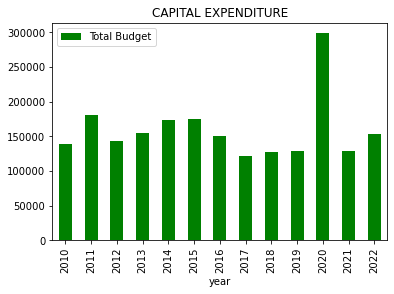

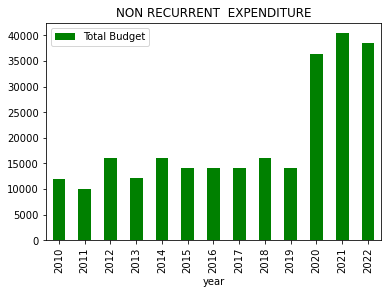

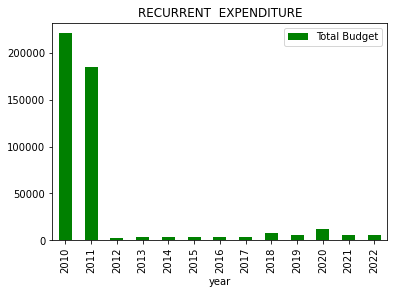

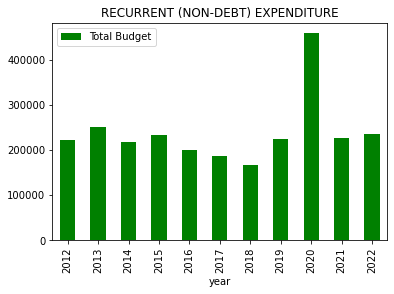

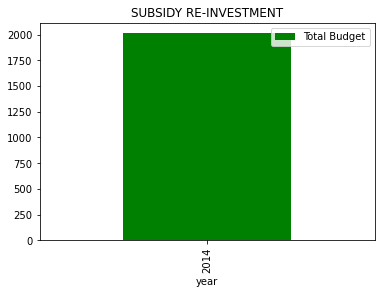

In [73]:
# 1. Add header 
# 2. Add function 
# 3. Add plots. 
# 4. Plot all together
for df in list_of_unique_expenditures:
    header = df.index[0]
    axes = df.plot.bar("year", "Total Budget", color="green", title=header)


In [74]:
def get_expenditure_by_year(year, df_expenditures=df_expenditures):
    year = float(year)
    return df_expenditures[df_expenditures["year"] == year]

In [75]:
df_expenditure_2022 = get_expenditure_by_year(2022)
df_expenditure_2022

,BUDGETYEAR,year,TYPE OF EXPENDITURE
TYPE OF EXPENDITURE,,,
CAPITAL EXPENDITURE,153672,2022,CAPITAL EXPENDITURE
NON RECURRENT EXPENDITURE,38418,2022,NON RECURRENT EXPENDITURE
RECURRENT EXPENDITURE,6066,2022,RECURRENT EXPENDITURE
RECURRENT (NON-DEBT) EXPENDITURE,234552,2022,RECURRENT (NON-DEBT) EXPENDITURE


In [76]:
df_main[budget_category].unique()

array(['STATUTORY', 'DEBT SERVICE', 'EXECUTIVE ARM', 'LEGISLATIVE ARM',
       'OTHERS', 'STATUTORY TRANSFER', 0], dtype=object)

In [77]:
df_budget_categories = df_main[[budget_year, budget_category, budget_amount]]

df_budget_categories = df_budget_categories.groupby(budget_year)
# split the grouped dataframe into a list of dataframes by their year. 
all_category_dfs = [df_budget_categories.get_group(x) for x in df_budget_categories.groups]

In [78]:
# use a for loop to acomplish this later 
new_df_category = []
df_budget_categories = pd.DataFrame()

for dataframe in all_category_dfs:
    dataframes_year = dataframe[budget_year].iloc[0]
    dataframe = dataframe.groupby(budget_category).sum()
    dataframe["year"] = dataframes_year
    df_budget_categories =  df_budget_categories.append(dataframe)

C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1911603292.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_budget_categories =  df_budget_categories.append(dataframe)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1911603292.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_budget_categories =  df_budget_categories.append(dataframe)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1911603292.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_budget_categories =  df_budget_categories.append(dataframe)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1911603292.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_budg

In [79]:
df_budget_categories[budget_category] = df_budget_categories.index
df_budget_categories.head()

,BUDGETYEAR,year,BUDGET CATEGORY
BUDGET CATEGORY,,,
DEBT SERVICE,4020,2010,DEBT SERVICE
EXECUTIVE ARM,188940,2010,EXECUTIVE ARM
LEGISLATIVE ARM,32160,2010,LEGISLATIVE ARM
OTHERS,138690,2010,OTHERS
STATUTORY,8040,2010,STATUTORY


In [80]:
unique_categories = df_budget_categories[budget_category].unique()
list_of_unique_categories = []
for unique_category in unique_categories: 
    # filter by type 
    df_budget_category_ = df_budget_categories[df_budget_categories[budget_category] == unique_category]
    # make a plot 
    df_budget_category_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
    list_of_unique_categories.append(df_budget_category_)
    # add plot to a list. 

C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1646206142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget_category_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1646206142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget_category_.rename(columns={"BUDGETYEAR": "Total Budget"}, inplace=True)
C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\1646206142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

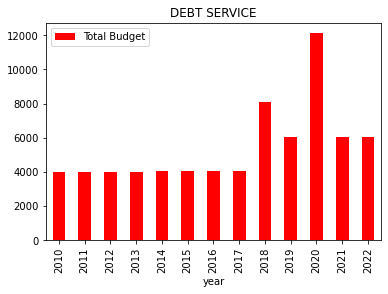

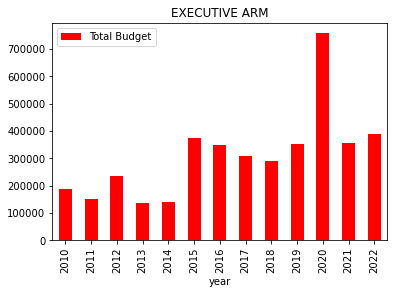

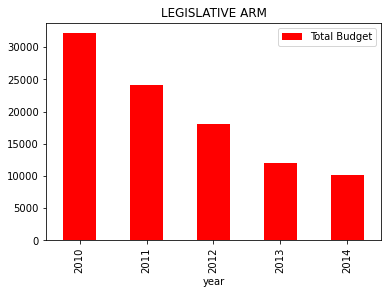

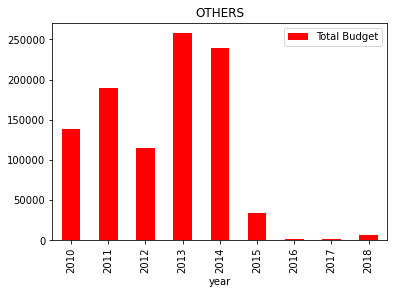

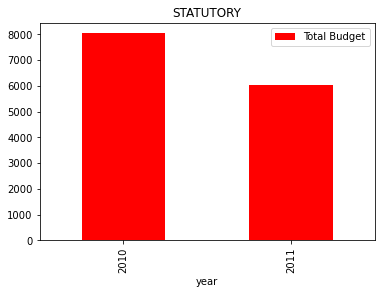

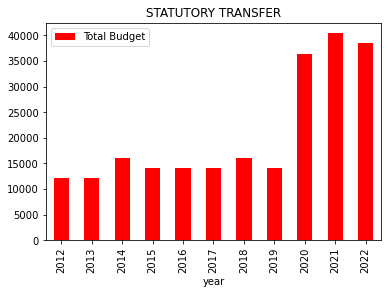

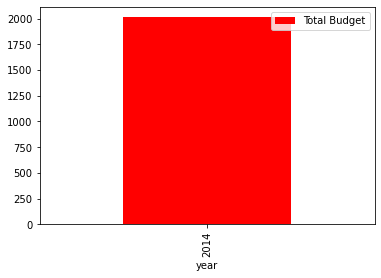

In [81]:
for df in list_of_unique_categories:
    header = df.index[0]
    axes = df.plot.bar("year", "Total Budget", color="red", title=header)

In [82]:
df_main[df_main["BUDGETYEAR"] == 2020]


,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,TOTAL BUDGET
1875,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,99000000000
1876,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,44200986326
1877,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,51120202624
1878,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,NATIONAL ASSEMBLY,115200000000
1879,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,PUBLIC COMPLAINTS COMMISSION,4230000000
...,...,...,...,...,...
2271,2020,EXECUTIVE ARM,CAPITAL EXPENDITURE,FGN INTERVENTION IN ZAMFARA/KATSINA/BORNO,1500000000.0
2272,2020,EXECUTIVE ARM,CAPITAL EXPENDITURE,FALCON EYE PROJECT (OFFICE OF THE NATIONAL SEC...,10000000000.0
2273,2020,EXECUTIVE ARM,CAPITAL EXPENDITURE,CONSTRUCTION OF NATIONAL ASSEMBLY LIBRARY (NLIDS),2000000000.0
2274,2020,EXECUTIVE ARM,CAPITAL EXPENDITURE,DIGITIZATION ARCHIVAL FOR SUPREME COURT PROCEE...,2500000000.0


In [83]:
df_20 = df_main[df_main["BUDGETYEAR"] == 2020]
df_20.head()

,BUDGETYEAR,BUDGET CATEGORY,TYPE OF EXPENDITURE,GOVERNMENT AGENCY,TOTAL BUDGET
1875,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,NATIONAL JUDICIAL COUNCIL,99000000000
1876,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,NIGER-DELTA DEVELOPMENT COMMISSION,44200986326
1877,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,UNIVERSAL BASIC EDUCATION,51120202624
1878,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,NATIONAL ASSEMBLY,115200000000
1879,2020,STATUTORY TRANSFER,NON RECURRENT EXPENDITURE,PUBLIC COMPLAINTS COMMISSION,4230000000


In [84]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 1875 to 2275
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   BUDGETYEAR           399 non-null    int32 
 1   BUDGET CATEGORY      399 non-null    object
 2   TYPE OF EXPENDITURE  399 non-null    object
 3   GOVERNMENT AGENCY    399 non-null    object
 4   TOTAL BUDGET         399 non-null    object
dtypes: int32(1), object(4)
memory usage: 17.1+ KB


In [85]:
df_20[budget_amount] = df_20[budget_amount].astype(float)

C:\Users\joogu\AppData\Local\Temp\ipykernel_9680\2400429503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20[budget_amount] = df_20[budget_amount].astype(float)


In [86]:
df_20_group = df_20.groupby([budget_category])[budget_amount].sum()

In [87]:
df_20_group

BUDGET CATEGORY
DEBT SERVICE          5.903420e+12
EXECUTIVE ARM         1.539564e+13
STATUTORY TRANSFER    7.970120e+11
Name: TOTAL BUDGET, dtype: float64

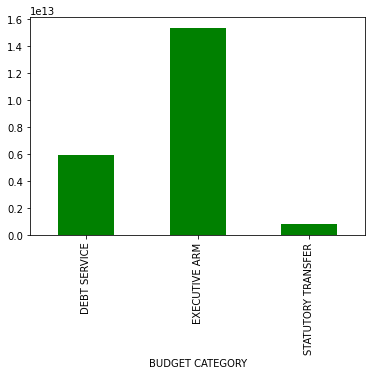

In [88]:
axes = df_20_group.plot.bar(budget_year, budget_category, color="green")